<a href="https://colab.research.google.com/github/jley2021/Final/blob/main/Copy_of_Hahn_Stats_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb
# Imports all of the necessary code

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Defines the variables for gathering the images, and placing them in the generator.

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();
# Adds labels and downloads the required data

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/1FOWc8CgO6FPCqpOztkK4wYezbUixS7iFfutgqEzyAmQ/edit#slide=id.g1a97ec7551c_0_0"

In [5]:
# url = "https://docs.google.com/presentation/d/1FOWc8CgO6FPCqpOztkK4wYezbUixS7iFfutgqEzyAmQ/edit#slide=id.g1a97ec7551c_0_0"

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)
# displays the images from the slides

In [7]:
images.shape
# Displays the amount and size

torch.Size([50, 3, 224, 224])

In [8]:
model(images)

tensor([[-4.8363, -1.7068, -6.5516,  ..., -6.4279,  2.2313,  4.6001],
        [-2.4608, -1.9322, -1.9595,  ..., -3.3712,  4.3565,  1.3660],
        [ 0.4997, -2.8844, -4.2445,  ..., -0.8599,  1.1021, -1.5325],
        ...,
        [-4.7939, -0.9637, -3.2163,  ..., -2.8385,  3.9926,  7.5527],
        [ 4.8401,  0.8611, -2.1509,  ..., -2.5376,  2.2719, -0.1798],
        [-2.1406, -2.5765, -4.3910,  ..., -5.1000,  4.1630,  1.6769]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [9]:
y = model(images)

In [10]:
y.shape

torch.Size([50, 1000])

In [11]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [12]:
for i in list(guesses):
    print(labels[i])
    #lists all of the identified images the code identified

golden retriever
Appenzeller
cocker spaniel, English cocker spaniel, cocker
golden retriever
golden retriever
pug, pug-dog
Samoyed, Samoyede
golden retriever
German shepherd, German shepherd dog, German police dog, alsatian
malinois
Border collie
hare
Sealyham terrier, Sealyham
Staffordshire bullterrier, Staffordshire bull terrier
Border collie
Eskimo dog, husky
Saint Bernard, St Bernard
flat-coated retriever
golden retriever
Labrador retriever
golden retriever
Bernese mountain dog
Pembroke, Pembroke Welsh corgi
English foxhound
Appenzeller
Egyptian cat
Egyptian cat
Egyptian cat
tiger cat
tabby, tabby cat
Siamese cat, Siamese
tabby, tabby cat
tabby, tabby cat
Persian cat
Persian cat
Egyptian cat
Egyptian cat
tabby, tabby cat
Egyptian cat
tabby, tabby cat
Egyptian cat
carton
Madagascar cat, ring-tailed lemur, Lemur catta
grey fox, gray fox, Urocyon cinereoargenteus
Egyptian cat
Siamese cat, Siamese
fox squirrel, eastern fox squirrel, Sciurus niger
tiger cat
Egyptian cat
tabby, tabby cat

In [13]:
Y = np.zeros(50,)
Y[25:] = 1

In [14]:
Y
#sets up an array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
X = y.detach().cpu().numpy() 

In [16]:
X.shape

(50, 1000)

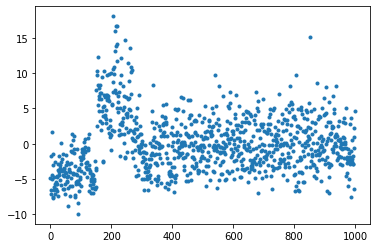

In [17]:
plt.plot(X[0],'.')
# plots the matches the generator identified

In [ ]:
X[0]

In [19]:
np.argmax(X[0])

207

In [20]:
labels[948]
# most correct identified

'Granny Smith'

In [21]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [22]:
for i in top_ten:
    print(labels[i])
    # lists the most accurate identified images 

golden retriever
Sussex spaniel
Brittany spaniel
Irish setter, red setter
tennis ball
Tibetan mastiff
cocker spaniel, English cocker spaniel, cocker
clumber, clumber spaniel
chow, chow chow
vizsla, Hungarian pointer


In [ ]:
labels

(array([ 10., 132., 240., 275., 188.,  96.,  30.,  19.,   6.,   4.]),
 array([-9.931279 , -7.1346726, -4.338066 , -1.5414596,  1.255147 ,
         4.0517535,  6.84836  ,  9.644966 , 12.441573 , 15.23818  ,
        18.034786 ], dtype=float32),
 <a list of 10 Patch objects>)

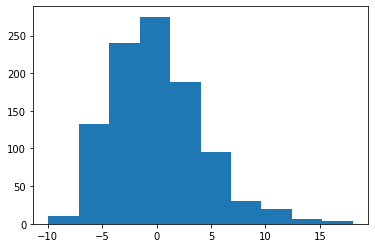

In [24]:
plt.hist(X[0])
# plots the identified data into a graph

In [25]:
X = GPU_data(X)
Y = GPU_data(Y)

In [26]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s
    # sets up the data

In [27]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [28]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)
    # labels and assigns the data

In [29]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [30]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [31]:
X.shape

torch.Size([50, 1000])

In [32]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [33]:
def model(x,w):

    return x@w[0]

In [34]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://tensorspace.org/